# Download IGRINS data from `Box`

IGRINS is in the process of migrating its data to the [Box](https://en.wikipedia.org/wiki/Box_(company)) cloud data storage service.  Here we show how to programmatically fetch that data with Python.

In [1]:
from muler.igrins import IGRINSSpectrum
import requests
%matplotlib inline
%config InlineBackend.figure_format='retina'

For now, you need the filename and Box static filename to fetch a spectrum.  Eventually this information may come from an observation Log provided by the IGRINS team.  At the moment, I just retrieved this information by navigating to the UTBox website.

These data are already public on the [muler_example_date repo](https://github.com/OttoStruve/muler_example_data/tree/main/IGRINS/01_IGRINS_test_data), but I uploaded them to a public UTBox folder for the purpose of this demo.  Eventually the entire IGRINS archive may be in a public UTBox like this.

In [2]:
URL = 'https://utexas.box.com/shared/static/'
download_dictionary = {'SDCH_20201202_0059.spec_a0v.fits':'verow76mp47nzk6m1t4y08xmwt0n6tlg.fits',
                       'SDCH_20201202_0059.sn.fits':'wl5roxf0zfgs3tnhqvnlkl9ixqp2xfve.fits'}

We need two files because the IGRINS pipeline houses the uncertainty values in a separate file from the flux values.

In [3]:
def download_file(filename, file_id):
    """Download the file from Google Drive"""
    session = requests.Session()
    response = session.get(URL+file_id)
    if response.status_code == 200: # Successfully found the file on Google Drive
        with open(filename, "wb") as f:
            f.write(response.content)
        print("Downloaded {}".format(filename))

In [4]:
for key, value in download_dictionary.items():
    download_file(key, value)

Downloaded SDCH_20201202_0059.spec_a0v.fits
Downloaded SDCH_20201202_0059.sn.fits


In [5]:
spectrum = IGRINSSpectrum(file='SDCH_20201202_0059.spec_a0v.fits', order=11).normalize()

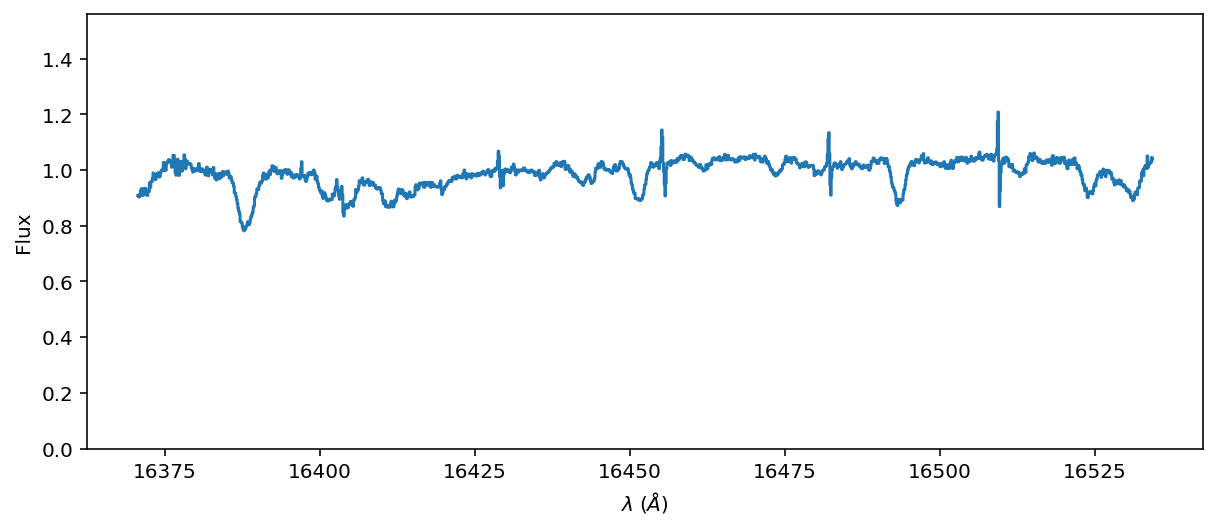

In [6]:
spectrum = spectrum.trim_edges().remove_nans()
spectrum.plot();

Great, we fetched the spectrum from UTBox, did some light post-processing, and plotted it, all in one fell swoop.